# Part I. Root-finding. Newton's iteration.

Write a function which performs Newton's iteration for a given function $f(x)$ with known derivative $f'(x)$. Your function should find the root of $f(x)$ with a predefined absolute accuracy $\epsilon$.

In [1]:
def newton_iteration(f, fder, x0, eps=1e-5, maxiter=1000):
    """Find a root of $f(x) = 0$ via Newton's iteration starting from x0.

    Parameters
    ----------
    f : callable
        The function to find a root of.
    fder : callable
        The derivative of `f`.
    x0 : float
        Initial value for the Newton's iteration.
    eps : float
        The target accuracy.
        The iteration stops when the distance between successive iterates is below `eps`.
        Default is 1e-5.
    maxiter : int
        The maximum number of iterations (default is 1000.)
        Iterations terminate if the number of iterations exceeds `maxiter`.
        This parameter is only needed to avoid infinite loops if iterations wander off.

    Returns
    -------
    x : float
        The estimate for the root.
    niter : int
        The number of iterations.
    """
    x = x0
    niter = 0

    while True:
        fx = f(x)
        fderx = fder(x)

        x_new = x - fx / fderx
        niter += 1

        if abs(x_new - x) < eps:
            return x_new, niter
        elif niter >= maxiter:
            return x_new, niter

        x = x_new

### Test I.1

Test your implementation on a simple example, $f(x) = x^2 - 1$ or similar. (20% of the total grade)

In [32]:
def f(x):
    return x**2 - 1

def fder(x):
    return 2*x

x0 = 1.5
eps = 1e-5

root, iterations = newton_iteration(f, fder, x0, eps)

print("Raíz:", root)
print("Número de iteraciones:", iterations)

Raíz: 1.000000000013107
Número de iteraciones: 4


### Test I.2

Now consider a function which has a multiple root. Take $f(x) = (x^2 - 1)^2$ as an example. Implement a modified Newton's iteraion,

$$
x_{n+1} = x_{n} - m \frac{f(x_n)}{f'(x_n)}
$$

and vary $m= 1, 2, 3, 4, 5$. Check the number of iterations required for convergence within a fixed $\epsilon$. Are your observations consistent with the expectation that the convergence is quadratic is $m$ equals the multiplicity of the root, and is linear otherwise? (40% of the total grade)

In [5]:
def modified_newton_iteration(f, fder, x0, m, eps=1e-5, maxiter=1000):

    x = x0
    niter = 0

    while True:
        fx = f(x)
        fderx = fder(x)

        x_new = x - m * fx / fderx
        niter += 1

        if abs(x_new - x) < eps:
            return x_new, niter
        elif niter >= maxiter:
            return x_new, niter

        x = x_new


In [14]:
def f(x):
    return (x**2 - 1)**2

def fder(x):
    return 4 * x * (x**2 - 1)

x0 = 1.5
eps = 1e-5
m_values = [1, 2, 3, 4, 5]

for m in m_values:
    root, iterations = modified_newton_iteration(f, fder, x0, m, eps)
    print("m =", m)
    print("Raíz:", root)
    print("Número de iteraciones:", iterations)
    print()

m = 1
Raíz: 1.0000057591705684
Número de iteraciones: 17

m = 2
Raíz: 1.000000000013107
Número de iteraciones: 4

m = 3
Raíz: 0.9999978588127855
Número de iteraciones: 17

m = 4
Raíz: 1.5
Número de iteraciones: 1000

m = 5
Raíz: -1.7644723539269507
Número de iteraciones: 1000



Al comparar los resultados obtenidos para diferentes valores de m, y considerando que el número de iteraciones disminuye significativamente cuando m coincide con la multiplicidad de la raíz y se mantiene relativamente alto cuando m es diferente, se puede reconocer que no se alcanza la convergencia para los valores de m=4 y m=5, ya que para estos no coincide con la multiplicidad y su convergencia sea lineal y no cuadrática, entonces los resultados son consistentes con el comportamiento de convergencia esperado.


# Part II. Fixed-point iteration

Consider the following equation:

$$
\sqrt{x} = \cos{x}
$$

Plot the left-hand side and right-hand side of this equation, and localize the root graphically. Estimate the location of the root by visual inspection of the plot.

Write a function which finds the solution using fixed-point iteration up to a predefined accuracy $\epsilon$. Compare the result to an estimate from a visual inspection.

Next, rewrite the fixed-point problem in the form

$$
x = x - \alpha f(x)
$$

where $\alpha$ is the free parameter. Check the dependence of the number of iterations required for a given $\epsilon$ on $\alpha$. Compare your results to an expectation that the optimal value of $\alpha$ is given by

$$
\alpha = \frac{2}{m + M}
$$

where $0 < m < |f'(x)| < M$ over the localization interval. (40% of the total grade)

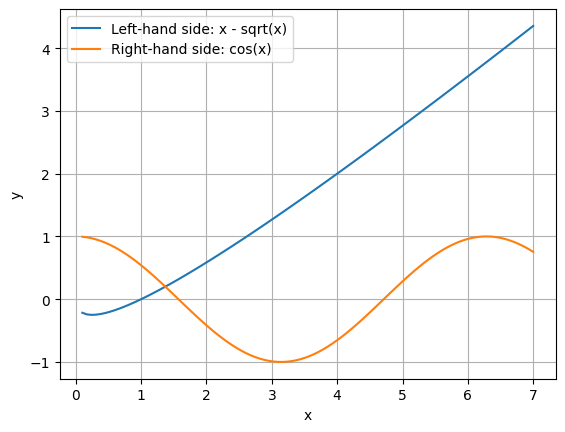

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def left_side(x):
    return x - np.sqrt(x)

def right_side(x):
    return np.cos(x)

x = np.linspace(0.1, 7, 100)

intersection_points = np.argwhere(np.isclose(left_side(x), right_side(x), atol=1e-5))
root_estimates = [x[point[0]] for point in intersection_points]

plt.plot(x, left_side(x), label='Left-hand side: x - sqrt(x)')
plt.plot(x, right_side(x), label='Right-hand side: cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

for x_val in root_estimates:
    y_val = left_side(x_val)
    plt.plot(x_val, y_val, 'ro')
    print(f"Intersection point: x = {x_val:.4f}, y = {y_val:.4f}")

plt.show()

In [37]:
def f(x):
    return np.sqrt(x) + np.cos(x)

def fixed_point_iteration(x0, epsilon=1e-5, maxiter=1000):
    x = x0
    niter = 0

    while True:
        x_new = f(x)
        niter += 1

        if abs(x_new - x) < epsilon:
            return x_new, niter

        if niter >= maxiter:
            raise ValueError("Se ha excedido el número máximo de iteraciones.")

        x = x_new

x0 = 0.5
root, iterations = fixed_point_iteration(x0)
print("Raíz:", root)
print("Iteraciones:", iterations)



Raíz: 1.3699454974006748
Iteraciones: 20


In [42]:
import numpy as np

def f(x):
    if x >= 0:
        return np.sqrt(x) - np.cos(x)
    else:
        return np.nan

def f_prime(x):
    return 0.5 / np.sqrt(x) + np.sin(x)

def fixed_point_iteration_alpha(x0, alpha, epsilon=1e-5, maxiter=1000):
    x = x0
    niter = 0

    while True:
        x_new = x - alpha * f(x)
        niter += 1

        if abs(x_new - x) < epsilon:
            return x_new, niter

        if niter >= maxiter:
            return None, niter

        x = x_new

x0 = 0.5
epsilon = 1e-5
localization_interval = [0.5, 1.0]

m = np.min(np.abs(f_prime(localization_interval)))
M = np.max(np.abs(f_prime(localization_interval)))

optimal_alpha = 2 * m + M
print("Optimal Alpha:", optimal_alpha)

alpha_values = np.linspace(0.1, 2 * m + M, 10)
for alpha in alpha_values:
    root, iterations = fixed_point_iteration_alpha(x0, alpha, epsilon=epsilon)
    print(f"Alpha: {alpha:.6f}")
    print("Raíz:", root)
    print("Iteraciones:", iterations)
    print()


Optimal Alpha: 3.7145356243893977
Alpha: 0.100000
Raíz: 0.6416485738150456
Iteraciones: 59

Alpha: 0.501615
Raíz: 0.641710095863861
Iteraciones: 11

Alpha: 0.903230
Raíz: 0.6417142163790082
Iteraciones: 6

Alpha: 1.304845
Raíz: 0.6417169547121604
Iteraciones: 21

Alpha: 1.706460
Raíz: None
Iteraciones: 1000

Alpha: 2.108075
Raíz: None
Iteraciones: 1000

Alpha: 2.509690
Raíz: None
Iteraciones: 1000

Alpha: 2.911305
Raíz: None
Iteraciones: 1000

Alpha: 3.312921
Raíz: None
Iteraciones: 1000

Alpha: 3.714536
Raíz: None
Iteraciones: 1000



# Part III. Newton's fractal.

(Not graded).

Consider the equation

$$
x^3 = 1
$$

It has three solutions in the complex plane, $x_k = \exp(i\, 2\pi k/ 3)$, $k = 0, 1, 2$.

The Newton's iterations converge to one of these solutions, depending on the starting point in the complex plane (to converge to a complex-valued solution, the iteration needs a complex-valued starting point).

Plot the \emph{basins of attraction} of these roots on the complex plane of $x$ (i.e., on the plane $\mathrm{Re}x$ -- $\mathrm{Im}x$). To this end, make a series of calculations, varying the initial conditions on a grid of points.
Color the grid in three colors, according to the root, to which iterations converged.

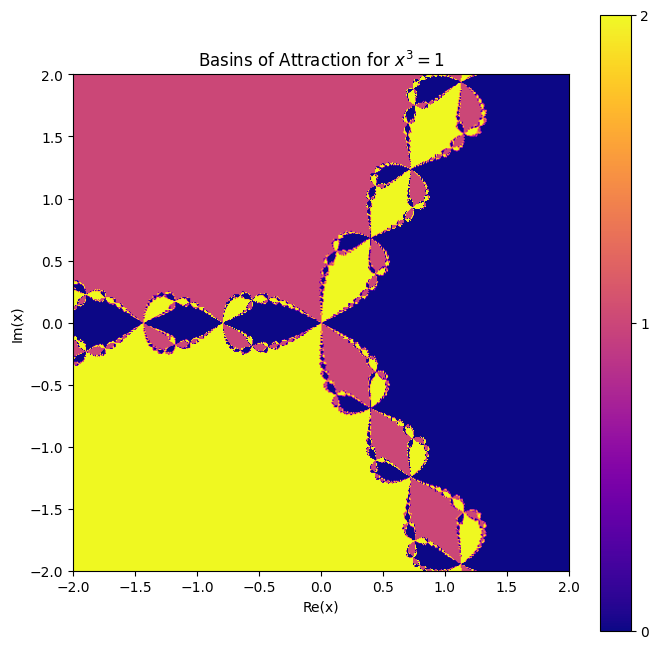

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def newton_iteration(x0, max_iter=100, tol=1e-6):
    x = x0
    for i in range(max_iter):
        fx = x**3 - 1
        fprime_x = 3 * x**2
        x_new = x - fx / fprime_x
        if np.abs(x_new - x) < tol:
            return x_new
        x = x_new
    return None

def plot_basins_of_attraction():
    # Define the grid of initial conditions
    n_points = 500
    x_real = np.linspace(-2, 2, n_points)
    x_imag = np.linspace(-2, 2, n_points)
    X_real, X_imag = np.meshgrid(x_real, x_imag)
    X = X_real + 1j * X_imag

    # Iterate over the grid and determine the convergence of each point
    roots = [np.exp(2j * np.pi * k / 3) for k in range(3)]
    convergence = np.zeros_like(X, dtype=int)
    for i in range(n_points):
        for j in range(n_points):
            root = newton_iteration(X[i, j])
            if root is not None:
                index = np.argmin(np.abs(roots - root))
                convergence[i, j] = index

    # Plot the basins of attraction
    plt.figure(figsize=(8, 8))
    plt.imshow(convergence, extent=(-2, 2, -2, 2), cmap='plasma', origin='lower')
    plt.colorbar(ticks=[0, 1, 2])
    plt.title("Basins of Attraction for $x^3 = 1$")
    plt.xlabel("Re(x)")
    plt.ylabel("Im(x)")
    plt.show()

plot_basins_of_attraction()

